In [1]:
!pip install pandas_profiling
!pip install sweetviz

In [2]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [9]:
data1 = pd.read_csv("Salary_Data.csv")
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


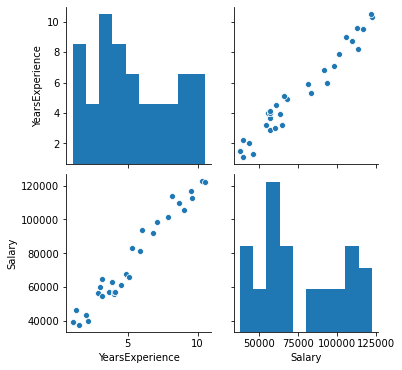

In [6]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data1)

In [8]:
#Creating dummy variable for Weather column
data2=pd.get_dummies(data1,columns=['Salary'])
data2

,YearsExperience,Salary_37731.0,Salary_39343.0,Salary_39891.0,Salary_43525.0,Salary_46205.0,Salary_54445.0,Salary_55794.0,Salary_56642.0,Salary_56957.0,...,Salary_93940.0,Salary_98273.0,Salary_101302.0,Salary_105582.0,Salary_109431.0,Salary_112635.0,Salary_113812.0,Salary_116969.0,Salary_121872.0,Salary_122391.0
0,1.1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [11]:
data2.values

array([[ 1.1,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1.3,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1.5,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 2. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 2.2,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        

In [13]:
array = data2.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:10])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.04 1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.1  0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.12 0.   0.   1.   0.   0.   0.   0.   0.   0.  ]]


In [14]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [15]:
array = data2.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.51 -0.19  5.39 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19]
 [-1.44 -0.19 -0.19 -0.19 -0.19  5.39 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19]
 [-1.37  5.39 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19]
 [-1.19 -0.19 -0.19 -0.19  5.39 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19]
 [-1.12 -0.19 -0.19  5.39 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19
  -0.19 -0.19 -0.19 -0.19 -0.19 -0.19 -0.19]]
